# Hear disease dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dh=pd.read_csv("Heart.csv")
dh.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [3]:
dh.shape

(303, 15)

In [4]:
dh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [6]:
dh.isnull().sum()
#this shows the no of null values and outliers and whether the data is clean

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [9]:
# here the data is not clean
# But if we wnat to clean the dataset then use foll
## To drop the unamed columns
dh=dh.drop(["Unnamed: 0"],axis=1)
dh.isnull().sum() 

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [14]:
#fillna is used to fill values in null values. here filling the mean values of the columns.
cols1=['Ca']
for i in cols1:
    mean_value=dh[i].mean()
    dh[i]=dh[i].fillna(value=mean_value)

In [15]:
dh.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         2
AHD          0
dtype: int64

In [16]:
dh

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.000000,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.000000,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.000000,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.000000,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.000000,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.000000,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.000000,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.000000,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.000000,normal,Yes


In [17]:
cols2=['Thal']
for i in cols2:
    dh[i]=dh[i].fillna(method="ffill")

# used to fill the missing value in the dataframe. ‘ffill’ stands for ‘forward fill’ and will propagate last valid observation forward.

In [18]:
all_cols=cols1+cols2

In [19]:
dh.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [20]:
# NOW THE DATASET IS CLEAN

In [21]:
#Data integration (Perform data integration using sqlite/mysql use any database of your choice):

In [22]:
import sqlite3

In [23]:
db=sqlite3.connect('sample.db')

In [24]:
c=db.cursor()

In [25]:
c.execute('create table company1(id int,name text, age int,addr text,salary real)')

In [26]:
c.execute("insert into company1 values(1,'vsk',40,'sfdsf',90000)")

In [27]:
c.execute("insert into company1 values(2,'vsk2',32,'sfdsf',93000)")

In [28]:
data=c.execute("select * from company1")

In [29]:
for record in data:
    print(record)

(1, 'vsk', 40, 'sfdsf', 90000.0)
(2, 'vsk2', 32, 'sfdsf', 93000.0)


In [30]:
db.commit()

In [33]:
#classification model on heart disease

In [34]:
import pandas as pd 
df = pd.read_csv("Heart.csv")
print(df.head())

   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No  


In [39]:
# Convert categorical values into numerical

In [37]:
df.ChestPain = pd.Categorical(df.ChestPain)
df['ChestPain'] = df.ChestPain.cat.codes

In [38]:
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,ChestPain_code
0,1,63,1,3,145,233,1,2,150,0,2.3,3,0.0,fixed,No,3
1,2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,0
2,3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,0
3,4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,normal,No,1
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,normal,No,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,3,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes,3
299,300,68,1,0,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes,0
300,301,57,1,0,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes,0
301,302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,normal,Yes,2


In [40]:
df.Thal = pd.Categorical(df.Thal)
df['Thal'] = df.Thal.cat.codes

In [41]:
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,ChestPain_code
0,1,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,No,3
1,2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,Yes,0
2,3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,Yes,0
3,4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,No,1
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,No,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,Yes,3
299,300,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,Yes,0
300,301,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,Yes,0
301,302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,1,Yes,2


In [42]:
df.AHD = pd.Categorical(df.AHD)
df['AHD'] = df.AHD.cat.codes

In [44]:
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,ChestPain_code
0,1,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0,3
1,2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1,0
2,3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1,0
3,4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0,1
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,1,3
299,300,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,1,0
300,301,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,1,0
301,302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,1,1,2


In [71]:
features = ['Age', 'RestBP', 'Chol', 'Ca', 'Thal']
X = dh[features]
X.describe()


,Age,RestBP,Chol,Ca
count,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,0.672241
std,9.038662,17.599748,51.776918,0.931209
min,29.000000,94.000000,126.000000,0.000000
25%,48.000000,120.000000,211.000000,0.000000
50%,56.000000,130.000000,241.000000,0.000000
75%,61.000000,140.000000,275.000000,1.000000
max,77.000000,200.000000,564.000000,3.000000


In [72]:
dh.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [73]:
for i in dh.columns:
    print(i)
    print(dh[i].value_counts())
    print("_____________________________")
    

Age
58    19
57    17
54    16
59    14
52    13
60    12
51    12
56    11
62    11
44    11
64    10
41    10
67     9
63     9
42     8
43     8
45     8
53     8
55     8
61     8
65     8
50     7
66     7
48     7
46     7
47     5
49     5
70     4
68     4
35     4
39     4
69     3
71     3
40     3
34     2
37     2
38     2
29     1
77     1
74     1
76     1
Name: Age, dtype: int64
_____________________________
Sex
1    206
0     97
Name: Sex, dtype: int64
_____________________________
ChestPain
asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: ChestPain, dtype: int64
_____________________________
RestBP
120    37
130    36
140    32
110    19
150    17
138    12
128    12
160    11
125    11
112     9
132     8
118     7
124     6
108     6
135     6
152     5
134     5
145     5
100     4
170     4
122     4
126     3
136     3
115     3
180     3
142     3
105     3
102     2
146     2
144     2
148     2
178     2
94      2
165     1


In [79]:
import matplotlib.pyplot as plt

In [80]:
dh.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

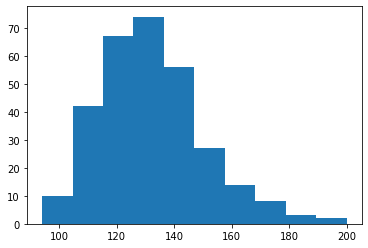

In [107]:
plt.hist(dh['RestBP'])
plt.show()

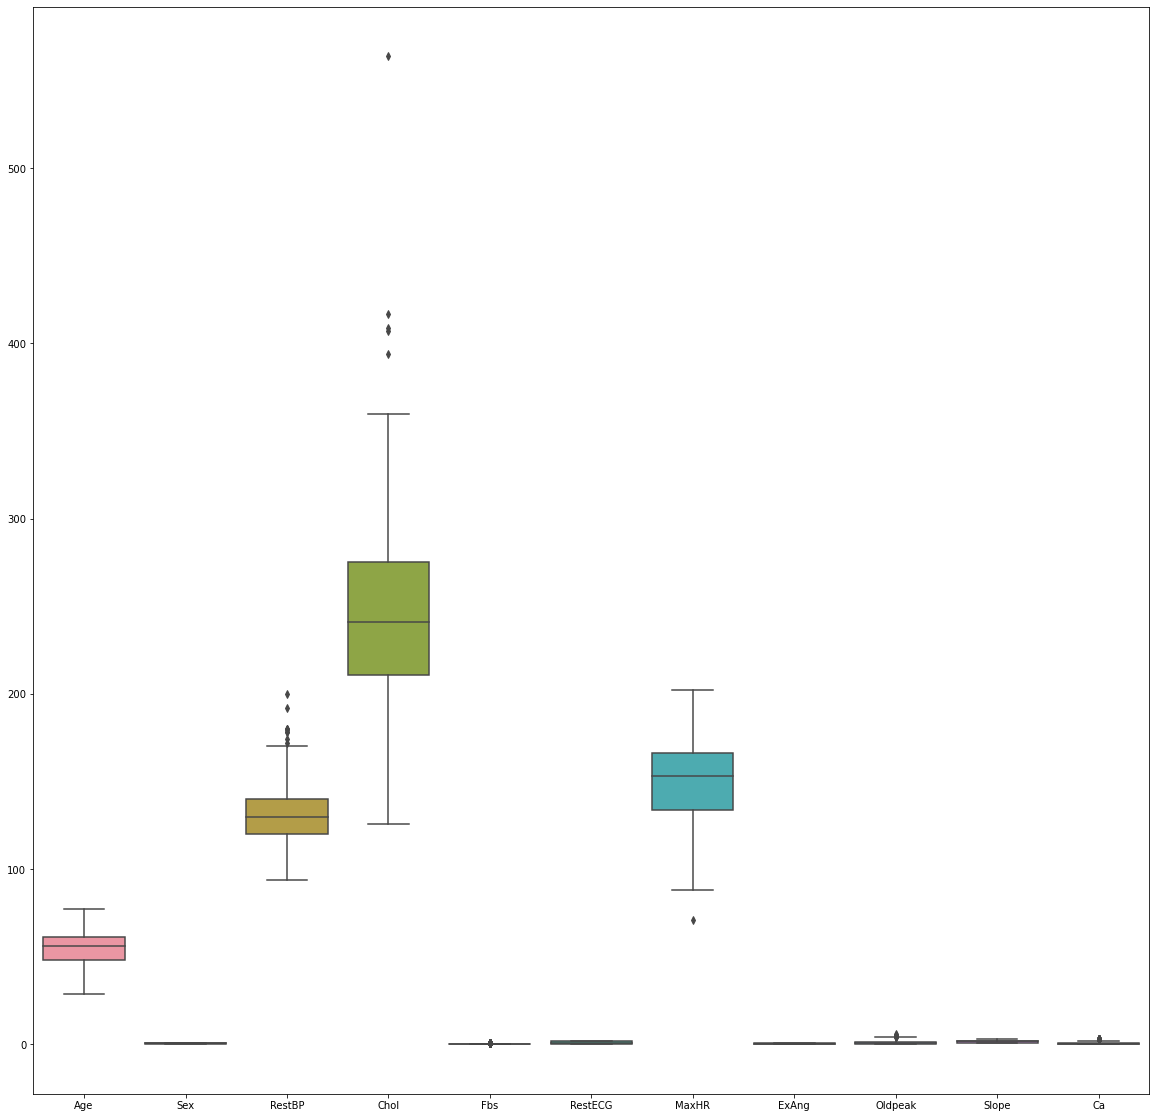

In [82]:
plt.figure(figsize=(20,20))
sns.boxplot(data=dh)
plt.show()

<AxesSubplot:>

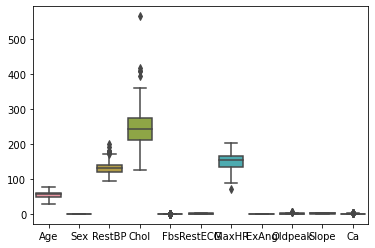

In [83]:
sns.boxplot(data=dh)

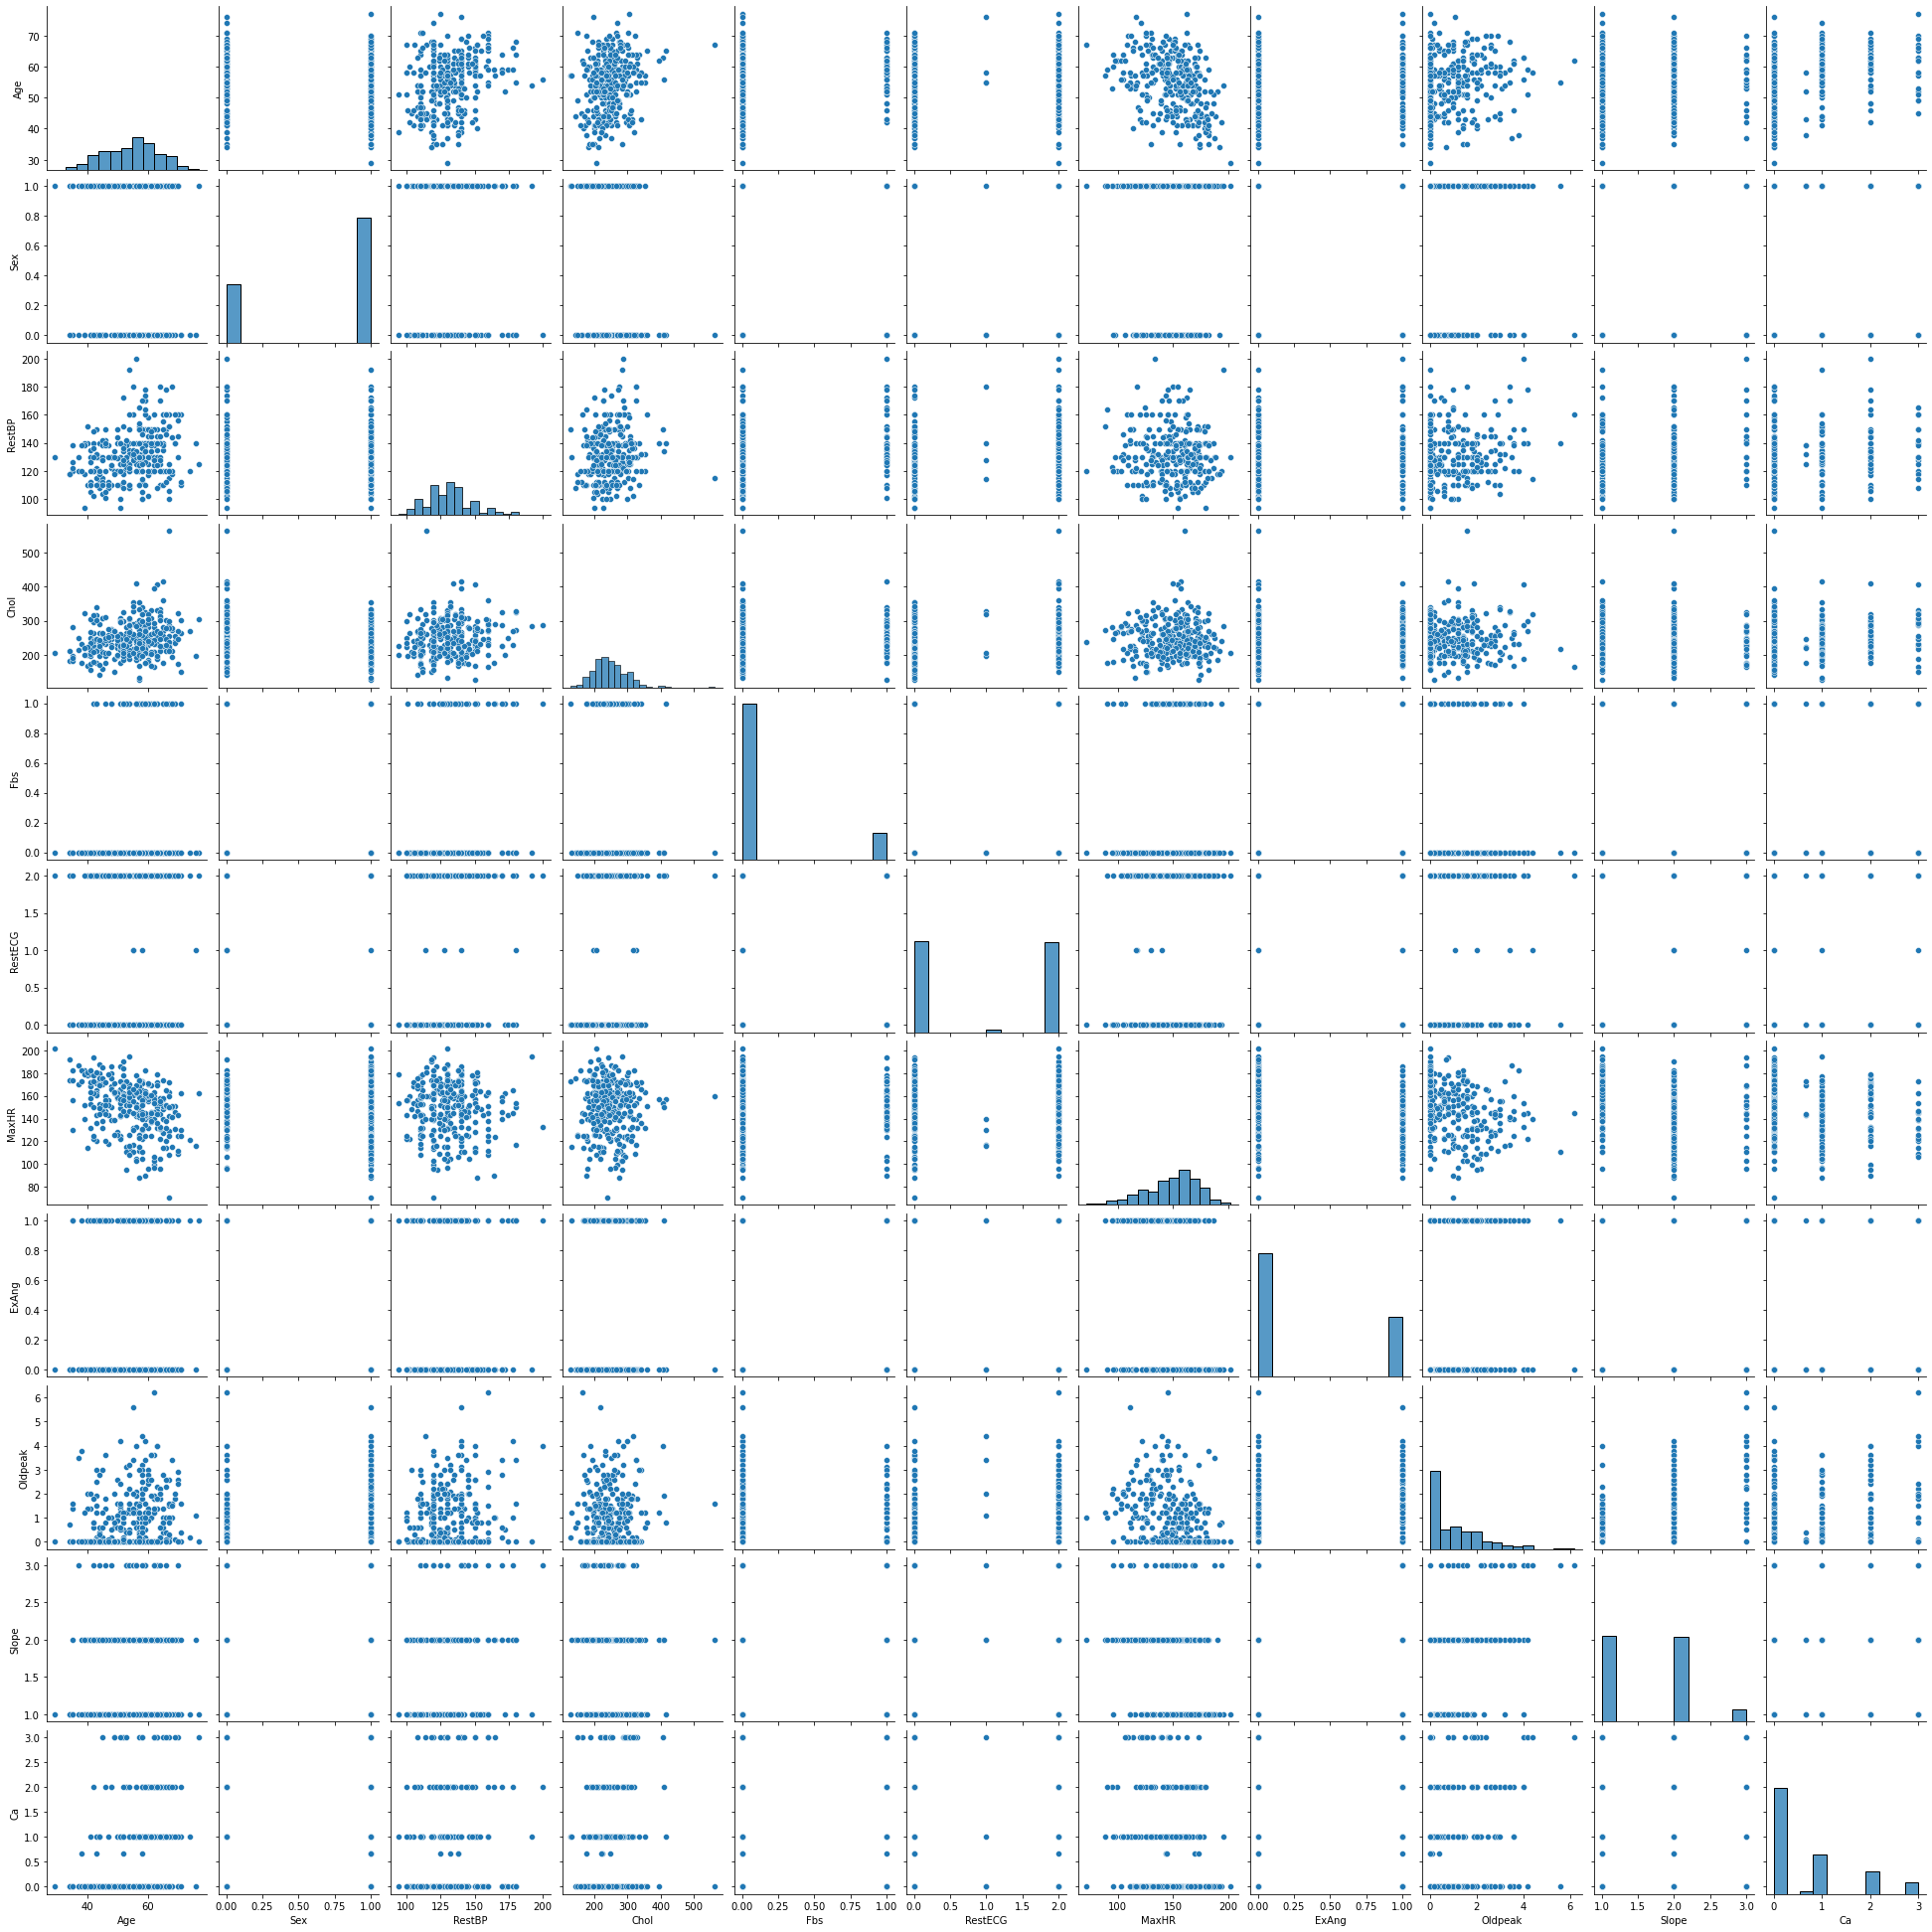

In [84]:
sns.pairplot(data=dh)

In [85]:
dh1=dh['Sex'].value_counts()

In [86]:
dh1

1    206
0     97
Name: Sex, dtype: int64

In [87]:
data=[dh1.iloc[0],dh1.iloc[1]]
labels=['Male','Female']

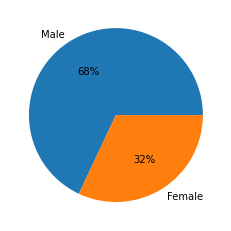

In [90]:
plt.pie(data,labels=labels,autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Chol'>

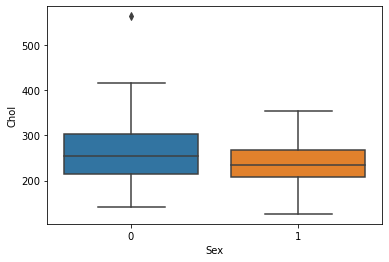

In [91]:
sns.boxplot(x="Sex",y="Chol",data=dh)

<AxesSubplot:xlabel='Sex', ylabel='Chol'>

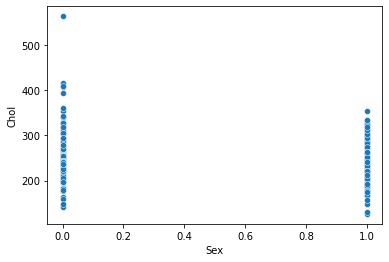

In [93]:
sns.scatterplot(x="Sex",y="Chol",data=dh)


In [108]:
plt.scatter(dh=['Age'], dh=['Chol'], c="blue")

SyntaxError: keyword argument repeated: dh (3275129853.py, line 1)

In [109]:
plt.show()

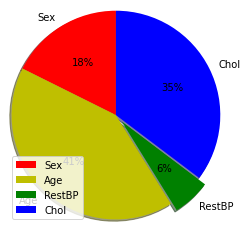

In [111]:
import matplotlib.pyplot as plt
  
# defining labels
activities = ['Sex', 'Age', 'RestBP', 'Chol']
  
# portion covered by each label
slices = [3, 7, 1, 6]
  
# color for each label
colors = ['r', 'y', 'g', 'b']
  
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors, 
        startangle=90, shadow = True, explode = (0, 0, 0.1, 0),
        radius = 1.2, autopct = '%.0f%%')
  
# plotting legend
plt.legend()
  
# showing the plot
plt.show()